# <font color ='red'> Tarea
Generar valores aleatorios para la siguiente distribución de probabilidad
    $$f(x)=\begin{cases}\frac{2}{(c-a)(b-a)}(x-a), & a\leq x \leq b\\ \frac{-2}{(c-a)(c-b)}(x-c),& b\leq x \leq c \end{cases}$$ con a=1; b=2; c=5
1. Usando el método de la transformada inversa.
2. Usando el método de aceptación y rechazo.
3. En la librería `import scipy.stats as st` hay una función que genera variables aleatorias triangulares `st.triang.pdf(x, c, loc, scale)` donde "c,loc,scale" son los parámetros de esta distribución (similares a los que  nuestra función se llaman a,b,c, PERO NO IGUALES). Explorar el help de python para encontrar la equivalencia entre los parámetros "c,loc,scale" y los parámetros de nuestra función con parámetros "a,b,c". La solución esperada es como se muestra a continuación:
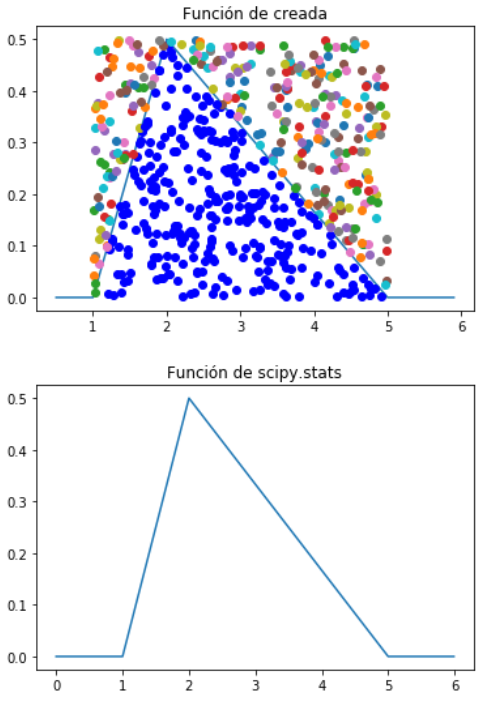

4. Generar 1000 variables aleatorias usando la función creada en el punto 2 y usando la función `st.triang.rvs` y graficar el histograma en dos gráficas diferentes de cada uno de los conjuntos de variables aleatorios creado. Se espera algo como esto:


In [1]:
import matplotlib.pyplot as plt
import numpy as np

1. Usando el método de la transformada inversa.

Defino mi $f(x)$ y grafico para comprobar

In [2]:
def f(x):
    a=1; b=2; c=5;
    if x < a:
        return 0 
    elif a <= x and x <= b:
        return 2*(x-a)/(c-a)/(b-a)
    elif b <= x and x <= c:
        return -2*(x-c)/(c-a)/(c-b)
    else:
        return 0

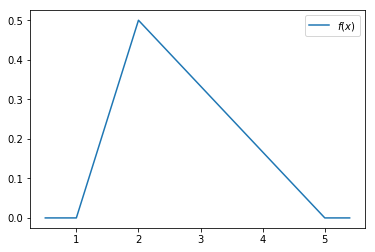

In [3]:
x = np.arange(.5,5.5,.1)
y = [f(i)for i in x]
plt.plot(x,y,label="$f(x)$")
plt.legend()
plt.show()

Calculo la CDF y grafico

$$F(x)=\begin{cases}\frac{(x-a)^2}{(c-a)(b-a)}, & a\leq x \leq b\\ \frac{(b-c)^2-(x-c)^2}{(c-a)(c-b)} + F(b),& b< x \leq c \end{cases}$$

In [4]:
def F(x):
    a=1; b=2; c=5;       
    if a <= x and x <= b:
        return (x-a)**2/(c-a)/(b-a)
    elif b < x and x <= c:
        return ((b-c)**2-(x-c)**2)/(c-a)/(c-b) + F(b)

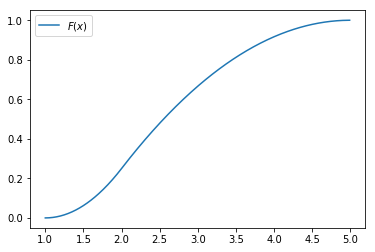

In [5]:
x1 = np.arange(1,5,.01)
y1 = [F(i)for i in x1]
plt.plot(x1,y1,label="$F(x)$")
plt.legend()
plt.show()

Saco la inversa de $F(x)$ (**Nota** nos interesa la raíz negativa)

$$F^{-1}(x)=\begin{cases}\sqrt{U(c-a)(b-a)}+a, & F(a)\leq U \leq F(b)\\ -\sqrt{(b-c)^2-(c-a)(c-b)(U-F(b))}+c,& F(b)< U \leq F(c) \end{cases}$$

In [6]:
def F_1(U):
    a=1; b=2; c=5;
    if F(a) <= U and U <= F(b):
        return np.sqrt(U*(c-a)*(b-a))+a
#     return c
    elif F(b) < U and U <= F(c):        
        return -np.sqrt((b-c)**2 -(c-a)*(c-b)*(U-F(b))) +c

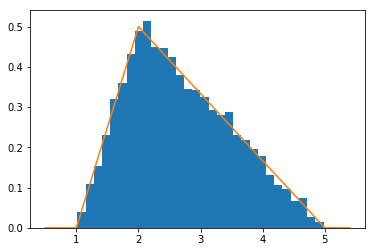

In [7]:
samples = 10000
X = list(map(lambda u:F_1(u),np.random.rand(samples)))
plt.hist(X,bins=30,density=True)
plt.plot(x,[f(i)for i in x],label="$f(x)$")
plt.show()

2. Usando el método de aceptación y rechazo.

Función triangular alcanza máximo en $f(2)$. Por lo tanto proponemos $\phi = Ch\,(x) = f(2) = Max(f) = .5$

$\int_a^b\phi= C = .5(b-a) \rightarrow h(x) = \frac\phi C = \frac 1{(b-a)}$

$H(x) = \frac{x-a}{b-a} \rightarrow H^{-1}(x) = x(b-a)+a$

Si $U_2<g(H^{-1}(u_1))$ entonces $Y = H^{-1}(u_1),g(x)=\frac{f(x)}{\phi}$

In [8]:
phi = lambda :.5
def H_1(u):
    a=1; b=5;
    return u*(b-a)+a

samples = 10000

3 y 4. Generar Aleatorios propios, comparar nuestra distribución contra Scipy.stats.triangular y crear aleatorios con Scipy.

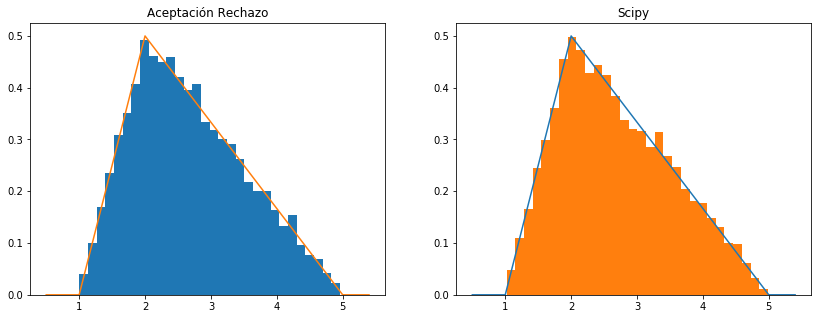

In [9]:
c = .5*(5-1)
Adjsamples =int(samples*c)
Y=list(filter(lambda y: np.random.rand() < f(y)/phi(),map(lambda u1:H_1(u1),np.random.rand(Adjsamples))))
plt.figure(1,figsize=(14,5))
plt.subplot(121)
plt.title("Aceptación Rechazo")
plt.hist(Y,bins=30,density=True)
plt.plot(x,[f(i)for i in x],label="$f(x)$")
plt.subplot(122)
# plt.show()
import scipy.stats as st
# x = np.arange(0,6,.1)
plt.plot(x,st.triang.pdf(x,loc=1,c=.25,scale=4))
plt.title('Scipy')
plt.hist(st.triang.rvs(loc=1,c=.25,scale=4,size=10000),bins=30,density=True)
plt.show()